# Outlier

In [17]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt

In [18]:
house = pd.read_csv('C:\\Users\\lucky\\Downloads\\data.csv')

In [19]:
house

,price,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,3.130000e+05,3,1340,7912,1.5,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline
1,2.384000e+06,5,3650,9050,2.0,4,5,3370,280,1921,0,709 W Blaine St,Seattle
2,3.420000e+05,3,1930,11947,1.0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent
3,4.200000e+05,3,2000,8030,1.0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue
4,5.500000e+05,4,1940,10500,1.0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1510,6360,1.0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle
4596,5.343333e+05,3,1460,7573,2.0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue
4597,4.169042e+05,3,3010,7014,2.0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton
4598,2.034000e+05,4,2090,6630,1.0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle


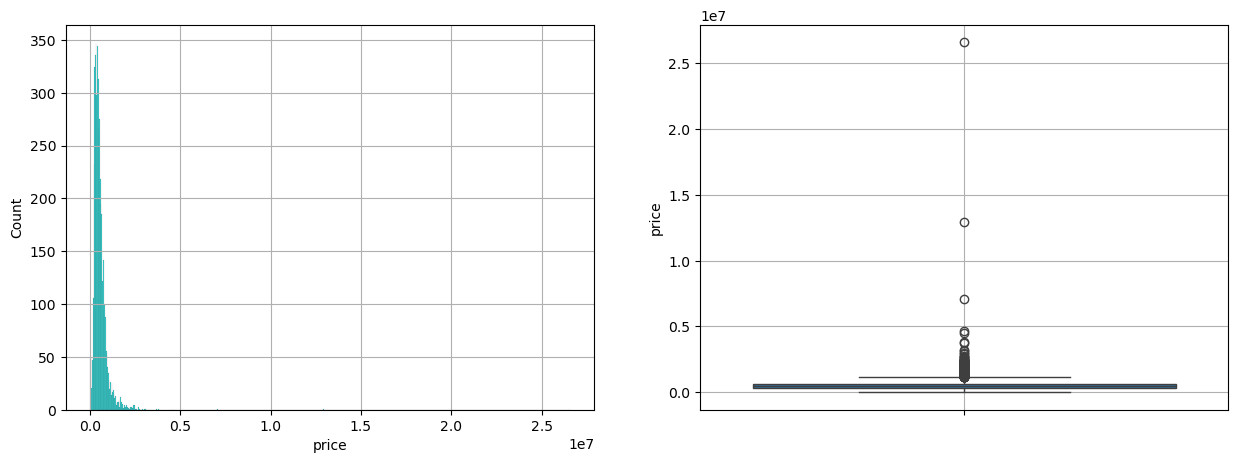

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=house,x='price',color='c')
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=house, y='price')
plt.grid()
plt.show()


# Outliers Detection
## using Interquartile range(IQR)

In [29]:
q1 = house['price'].quantile(.25)
q3 = house['price'].quantile(.75)
IQR = q3-q1
lowerLimit= q1-1.5*IQR
upperLimit=q3+1.5*IQR

In [30]:
lowerLimit

-175256.25

In [31]:
upperLimit

1153093.75

# Trimming from the price  

In [33]:
house['outliers for price'] = (house['price']<lowerLimit) | (house['price']>upperLimit)

In [34]:
house

,price,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,outliers for price
0,3.130000e+05,3,1340,7912,1.5,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,False
1,2.384000e+06,5,3650,9050,2.0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,True
2,3.420000e+05,3,1930,11947,1.0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,False
3,4.200000e+05,3,2000,8030,1.0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,False
4,5.500000e+05,4,1940,10500,1.0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1510,6360,1.0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,False
4596,5.343333e+05,3,1460,7573,2.0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,False
4597,4.169042e+05,3,3010,7014,2.0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,False
4598,2.034000e+05,4,2090,6630,1.0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,False


### Outliers in the new column which is "Outliers for price"

In [39]:
house.head(50)

,price,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,outliers for price
0,313000.0,3,1340,7912,1.5,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,False
1,2384000.0,5,3650,9050,2.0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,True
2,342000.0,3,1930,11947,1.0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,False
3,420000.0,3,2000,8030,1.0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,False
4,550000.0,4,1940,10500,1.0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,False
5,490000.0,2,880,6380,1.0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,False
6,335000.0,2,1350,2560,1.0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,False
7,482000.0,4,2710,35868,2.0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,False
8,452500.0,3,2430,88426,1.0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,False
9,640000.0,4,1520,6200,1.5,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,False


In [35]:
data_clean = house[house['outliers for price']]==False

In [36]:
data_clean

,price,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,outliers for price
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
11,False,False,False,False,False,True,False,False,False,False,False,False,False,False
14,False,False,False,False,False,True,False,False,True,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,True,False,False,False
122,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,False,False,False,False,False,True,False,False,True,False,False,False,False,False
4350,False,False,False,False,False,True,False,False,True,False,True,False,False,False
4465,False,False,False,False,False,True,False,False,False,False,True,False,False,False
4467,False,False,False,False,False,True,False,False,True,False,True,False,False,False


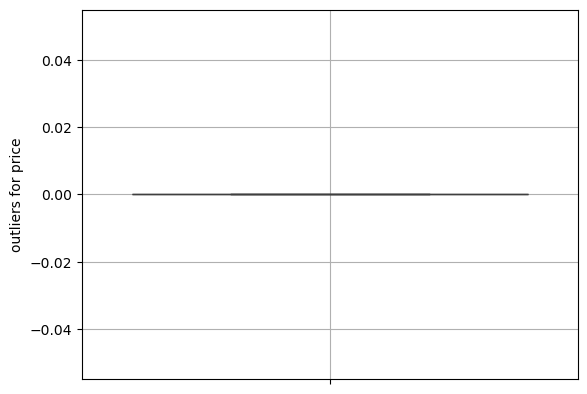

In [43]:
sns.boxplot(data=data_clean,y='outliers for price')
plt.grid()
plt.show()

In [44]:
data_clean.head(50)

,price,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,outliers for price
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
11,False,False,False,False,False,True,False,False,False,False,False,False,False,False
14,False,False,False,False,False,True,False,False,True,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,True,False,False,False
122,False,False,False,False,False,False,False,False,False,False,True,False,False,False
133,False,False,False,False,False,True,False,False,True,False,True,False,False,False
193,False,False,False,False,False,True,False,False,False,False,True,False,False,False
201,False,False,False,False,False,True,False,False,False,False,True,False,False,False
217,False,False,False,False,False,True,False,False,True,False,False,False,False,False
227,False,False,False,False,False,True,False,False,False,False,False,False,False,False
